In [1]:
import os
import pandas as pd
from matplotlib import cm
from matplotlib import pyplot as plt
import numpy as np


In [2]:
# Define DEFAULT_PLOT_STYLE
DEFAULT_PLOT_STYLE = {'figure.figsize': (10, 6), 'axes.titlesize': 14, 'axes.labelsize': 12, 'legend.fontsize': 10, 'xtick.labelsize': 10, 'ytick.labelsize': 10, 'axes.grid': True, 'grid.alpha': 0.7, 'grid.linestyle': '--'}


In [3]:
def plot_rfe(directory: str, metric: str):
    rfe = pd.read_csv(os.path.join(directory, 'leaderboard.csv'), index_col='ID')
    rfe['ID'] = rfe.index.values

    try:
        baseline_general = pd.read_csv(
            os.path.join(directory, 'leaderboard.csv'),
            index_col='ID').loc['finetune'][metric]
    except KeyError:
        print("'finetune' entry not found in baseline leaderboard. Using minimum value in RFE as baseline.")
        baseline_general = rfe[metric].min()

    with plt.style.context(DEFAULT_PLOT_STYLE):
        fig, ax = plt.subplots()

        rfe.plot.scatter(x='ID', y=metric, ax=ax, alpha=0.7, s=5)
        ax.invert_xaxis()
        ax.set_ylim(0, 1.05)
        ax.hlines(y=baseline_general, xmin=rfe.ID.min(), xmax=rfe.ID.max(), color='r', linestyle='--', label='Baseline')
        ax.set_ylabel(metric.capitalize())
        ax.set_xlabel('# Active features')
        ax.grid(axis='y')
        ax.legend()
        fig.tight_layout()
        fig.savefig(os.path.join(directory, f'leaderboard_{metric}.pdf'))
        plt.show()


### Plot Results

'finetune' entry not found in baseline leaderboard. Using minimum value in RFE as baseline.


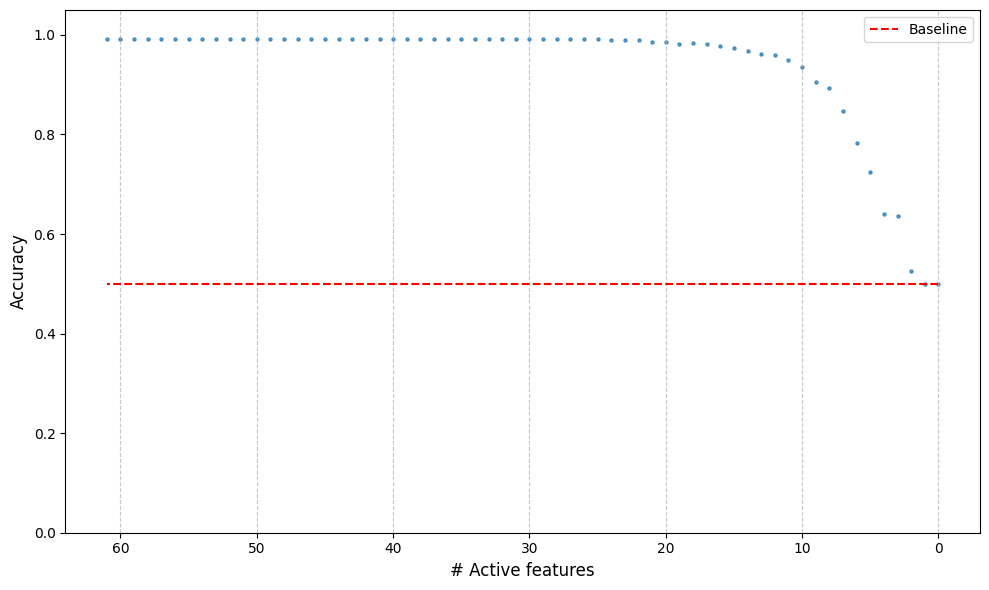

In [4]:
# Set the directory and metric
directory = './datasets/CICIDS2017/balanced_binary/automl_search/feature_ranking_custom_sbe'
metric = 'accuracy'

# Plot the results
plot_rfe(directory, metric)


### Identify and List Important and Unimportant Features

In [5]:
# Load the feature importance data
feature_importance_path = './datasets/CICIDS2017/balanced_binary/automl_search/feature_ranking_custom_sbe/feature_importance.csv'
feature_importance_df = pd.read_csv(feature_importance_path)

# Calculate the average importance score for each feature
average_importance = feature_importance_df.mean(axis=0)

# Set a threshold for determining unimportant features
importance_threshold = average_importance.mean() / 10  # For example, features with importance scores less than 10% of the mean are considered unimportant

# Identify unimportant features
unimportant_features = average_importance[average_importance < importance_threshold].index.tolist()

# Identify important features
important_features = average_importance[average_importance >= importance_threshold].index.tolist()

# Display unimportant features
print("Unimportant Features:")
for feature in unimportant_features:
    print(feature)

# Display important features
print("\nImportant Features:")
for feature in important_features:
    print(feature)

# Save unimportant features to a file
unimportant_features_path = './datasets/CICIDS2017/balanced_binary/automl_search/feature_ranking_custom_sbe/unimportant_features.txt'
with open(unimportant_features_path, 'w') as file:
    for feature in unimportant_features:
        file.write(f"{feature}\n")

# Save important features to a file
important_features_path = './datasets/CICIDS2017/balanced_binary/automl_search/feature_ranking_custom_sbe/important_features.txt'
with open(important_features_path, 'w') as file:
    for feature in important_features:
        file.write(f"{feature}\n")


Unimportant Features:
Flow Duration
Total Length of Fwd Packets
Total Length of Bwd Packets
Fwd Packet Length Max
Fwd Packet Length Min
Fwd Packet Length Mean
Fwd Packet Length Std
Bwd Packet Length Max
Bwd Packet Length Min
Bwd Packet Length Mean
Bwd Packet Length Std
Flow Bytes/s
Flow Packets/s
Flow IAT Mean
Flow IAT Std
Flow IAT Max
Flow IAT Min
Fwd IAT Total
Fwd IAT Mean
Fwd IAT Std
Fwd IAT Max
Fwd IAT Min
Bwd IAT Total
Bwd IAT Mean
Bwd IAT Std
Bwd IAT Max
Bwd IAT Min
Fwd PSH Flags
Fwd URG Flags
Fwd Header Length
Bwd Header Length
Fwd Packets/s
Bwd Packets/s
Min Packet Length
Max Packet Length
Packet Length Mean
Packet Length Std
Packet Length Variance
FIN Flag Count
URG Flag Count
Down/Up Ratio
Avg Bwd Segment Size
Subflow Fwd Bytes
Init_Win_bytes_forward
Init_Win_bytes_backward
min_seg_size_forward
Active Mean
Active Std
Active Max
Active Min
Idle Mean
Idle Std
Idle Max
Idle Min

Important Features:
ID
Destination Port
Total Fwd Packets
Total Backward Packets
PSH Flag Count
ACK F